## Airbnb data Analytics

##### Renting out their unused room is the basic concept behind the Airbnb with that the traveller can get cheap accomodation and owner of the house can moentize their unused rooms. It is gaining momentum and Airbnb wants to gain more market share by showing to the prospective owners that how can much they can earn from their property. For that we need to create a good analytics solution that they can show the earning potential to the prospective customers.

#### room_id: A unique number identifying an Airbnb listing
#### host_id: A unique number identifying an Airbnb host
#### room_type: One of Entire home, Private room, or Shared room
#### borough: A subregion of the city or search area for which the survey is carried out. The borough is taken from a shapefile of the city that is obtained independently of the Airbnb web site. For some cities, there is no borough information; for others the borough may be a number.
#### neighborhood: As with borough: a subregion of the city or search area for which the survey is carried out. For cities that have both, a neighbourhood is smaller than a borough. For some cities there is no neighbourhood information.
#### reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.
#### overall_satisfaction: The average rating (out of five) that the listing has received from those visitors who left a review.
#### accommodates: The number of guests a listing can accommodate.
#### bedrooms: The number of bedrooms a listing offers.

#### minstay: The minimum stay for a visit, as posted by the host.
#### latitude and longitude: The latitude and longitude of the listing as posted on the Airbnb site: this may be off by a few   hundred metres.
#### last_modified: the date and time that the values were read from the Airbnb web site.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airbnb = pd.read_csv('Airbnb data.csv')

In [3]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
#Dropping Shared rooms because of their low volume,
airbnb = airbnb[airbnb.room_type != 'Shared room']

In [5]:
#Shared Room is dropped",
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Name: room_type, dtype: int64

#### It shows where the most popular neighborhood also it is saying near which neighborhood most of the rooms are situated,
#### We can do analysis like the most preferred neighborhood or near which neighborhood most of the visitor coming or whether having a particular type of neighborhood helps you get better rent or reviews or rating etc.,

In [6]:
airbnb.neighborhood.value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

In [7]:
airbnb.reviews.value_counts()

0      2975
1      1500
2      1238
3      1100
4       924
       ... 
390       1
166       1
323       1
201       1
188       1
Name: reviews, Length: 283, dtype: int64

In [8]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

### Finding those properties where overall_satisfaction is zero and exploring them

In [9]:
airbnb_0_satisfaction = airbnb[airbnb.overall_satisfaction == 0]

In [10]:
airbnb_0_satisfaction.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,5.721000e+03,5721.0,5.721000e+03,0.0,0.0,5721.000000,5721.0,5721.000000,5721.000000,0.0,5721.000000,0.0,5721.000000,5721.000000
mean,1.472219e+07,1476.0,4.674155e+07,NaN,NaN,0.700926,0.0,3.024821,1.554623,NaN,175.620696,NaN,52.364361,4.889534
std,5.209774e+06,0.0,4.424869e+07,NaN,NaN,0.814133,0.0,1.352056,0.949345,NaN,140.020220,NaN,0.015795,0.036742
min,2.542800e+04,1476.0,2.234000e+03,NaN,NaN,0.000000,0.0,1.000000,0.000000,NaN,22.000000,NaN,52.296200,4.771083
25%,1.150164e+07,1476.0,9.749992e+06,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,114.000000,NaN,52.353951,4.862918
50%,1.643578e+07,1476.0,2.962380e+07,NaN,NaN,0.000000,0.0,2.000000,1.000000,NaN,150.000000,NaN,52.363567,4.886634
75%,1.917347e+07,1476.0,7.652614e+07,NaN,NaN,1.000000,0.0,4.000000,2.000000,NaN,209.000000,NaN,52.374183,4.909861
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.013075


In [11]:
airbnb[airbnb.accommodates == 3].overall_satisfaction.value_counts()

5.0    621
0.0    483
4.5    411
4.0     56
3.5      8
3.0      4
Name: overall_satisfaction, dtype: int64

In [12]:
airbnb[airbnb.bedrooms ==2].overall_satisfaction.value_counts()

5.0    1787
0.0    1487
4.5    1033
4.0     127
3.5      16
3.0       6
Name: overall_satisfaction, dtype: int64

In [13]:
#Rating based on the price range,
airbnb[(airbnb.price >= 150) & (airbnb.price <=180)].overall_satisfaction.value_counts()

5.0    1634
0.0    1169
4.5     881
4.0     104
3.5      12
3.0       4
Name: overall_satisfaction, dtype: int64

In [14]:
#Based on above exploration, inserting overall satisfaction value of 4 where it is missing\n",
airbnb_imputed_satisfaction = airbnb

In [15]:
#Imputing the value 4 in overall satisfaction where the value is present as 0\n",
airbnb_imputed_satisfaction.overall_satisfaction = airbnb_imputed_satisfaction.overall_satisfaction.replace(0,4)

In [16]:
airbnb_imputed_satisfaction.overall_satisfaction.value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [17]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [19]:
airbnb.price.value_counts()

119.0    1023
180.0     999
144.0     886
150.0     621
132.0     587
         ... 
435.0       1
339.0       1
337.0       1
369.0       1
28.0        1
Name: price, Length: 419, dtype: int64

In [20]:
airbnb.accommodates.value_counts()

2     9996
4     5563
3     1583
6      475
5      470
1      355
8      105
7       52
16      18
10      16
12       9
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

In [21]:
import numpy as np

In [22]:
airbnb.bedrooms.value_counts()/airbnb.bedrooms.count()

1.0     0.591533
2.0     0.238800
3.0     0.077385
0.0     0.061844
4.0     0.025348
5.0     0.003323
6.0     0.001018
10.0    0.000268
7.0     0.000214
8.0     0.000161
9.0     0.000107
Name: bedrooms, dtype: float64

In [23]:
#Dropping values where bedrooms are equal to zero     
airbnb = airbnb[airbnb.bedrooms != 0]

In [24]:
#Values without zero bedrooms
airbnb.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [25]:
#values with zero bedrooms     
airbnb.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [26]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17506 entries, 33 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               17506 non-null  int64  
 1   survey_id             17506 non-null  int64  
 2   host_id               17506 non-null  int64  
 3   room_type             17506 non-null  object 
 4   country               0 non-null      float64
 5   city                  17506 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          17506 non-null  object 
 8   reviews               17506 non-null  int64  
 9   overall_satisfaction  17506 non-null  float64
 10  accommodates          17506 non-null  int64  
 11  bedrooms              17506 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 17506 non-null  float64
 14  minstay               0 non-null      float64
 15  name              

In [27]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.750600e+04,17506.0,1.750600e+04,0.0,0.0,17506.000000,17506.000000,17506.000000,17506.000000,0.0,17506.000000,0.0,17506.000000,17506.000000
mean,1.108287e+07,1476.0,3.509582e+07,NaN,NaN,16.368959,4.531932,2.960642,1.526220,NaN,169.137267,NaN,52.365207,4.888416
std,6.080450e+06,0.0,3.710345e+07,NaN,NaN,32.796906,0.441955,1.333545,0.825627,NaN,111.009236,NaN,0.015112,0.034722
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,5.923722e+06,1476.0,7.004309e+06,NaN,NaN,2.000000,4.000000,2.000000,1.000000,NaN,113.000000,NaN,52.355177,4.863899
50%,1.210997e+07,1476.0,1.956281e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364507,4.885528
75%,1.643984e+07,1476.0,5.089235e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,196.000000,NaN,52.374604,4.907448
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


## Data Visualization

In [28]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


(array([7292., 3231., 1943., 1235.,  836.,  577.,  411.,  321.,  232.,
         196.,  159.,  115.,   91.,   77.,   82.,   51.,   49.,   45.,
          44.,   57.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

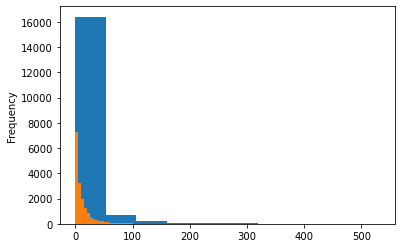

In [29]:
airbnb.reviews.plot(kind = 'hist')
plt.hist(airbnb.reviews,bins=20,range=(0,100))

(array([1.870e+02, 2.858e+03, 5.970e+03, 4.259e+03, 2.002e+03, 7.720e+02,
        6.360e+02, 3.180e+02, 1.560e+02, 1.530e+02, 6.200e+01, 3.800e+01,
        1.000e+01, 1.600e+01, 2.000e+01, 1.200e+01, 6.000e+00, 1.000e+00,
        5.000e+00, 3.000e+00]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

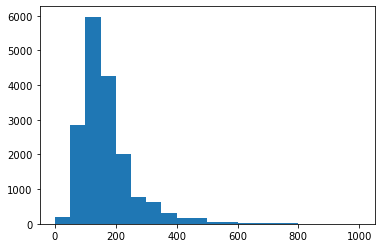

In [30]:
plt.hist(airbnb.price,bins=20,range=(0,1000))

(array([3.250e+02, 9.105e+03, 1.489e+03, 5.437e+03, 4.640e+02, 4.710e+02,
        5.200e+01, 1.050e+02, 8.000e+00, 1.500e+01, 2.000e+00, 8.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 1.900e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 <BarContainer object of 16 artists>)

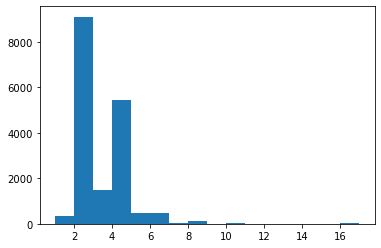

In [31]:
plt.hist(airbnb.accommodates,bins=16)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.500e+01,
        9.500e+01, 5.902e+03, 4.226e+03, 7.266e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

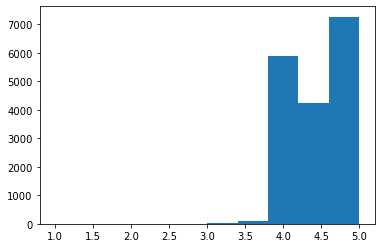

In [32]:
plt.hist(airbnb.overall_satisfaction)

(array([   6.,    0.,   43.,    0.,    0., 3291.,    0., 2489.,    0.,
        4401.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

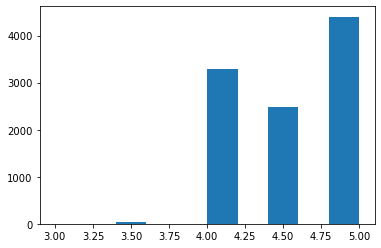

In [33]:
plt.hist(airbnb[(airbnb.price >= 100) & (airbnb.price <= 200)].overall_satisfaction)

(array([ 2.,  0.,  0., 78.,  0.,  0., 61.,  0.,  0., 46.]),
 array([3.5 , 3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  ]),
 <BarContainer object of 10 artists>)

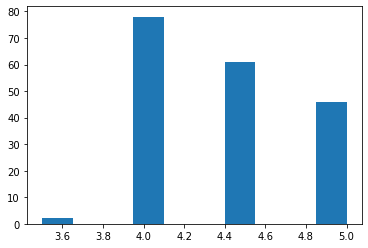

In [34]:
plt.hist(airbnb[airbnb.price < 50].overall_satisfaction)

(array([1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.700e+01, 0.000e+00,
        1.550e+03, 0.000e+00, 7.850e+02, 1.874e+03]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

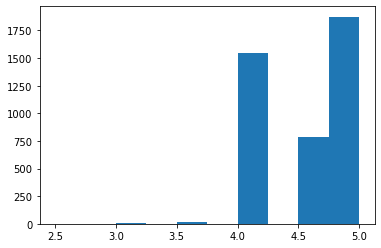

In [35]:
plt.hist(airbnb[airbnb.price > 200].overall_satisfaction)

(array([  1.,   0.,   0.,   0.,   5.,   0., 402.,   0., 198., 481.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 10 artists>)

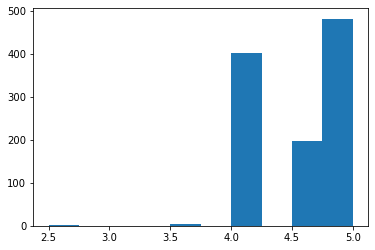

In [36]:
plt.hist(airbnb[airbnb.price > 300].overall_satisfaction)

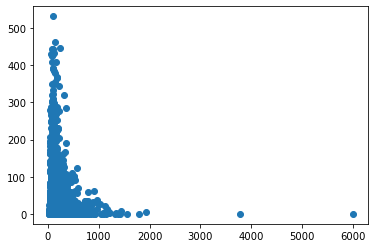

In [37]:
plt.scatter(airbnb.price, airbnb.reviews)

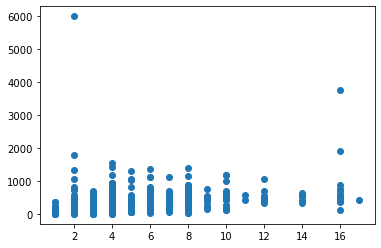

In [38]:
plt.scatter(airbnb.accommodates,airbnb.price)

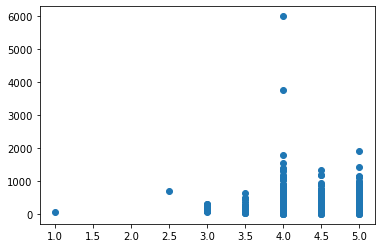

In [39]:
plt.scatter(airbnb.overall_satisfaction,airbnb.price)

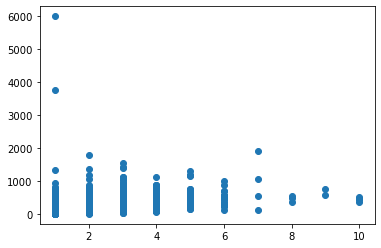

In [40]:
plt.scatter(airbnb.bedrooms,airbnb.price)

<AxesSubplot:>

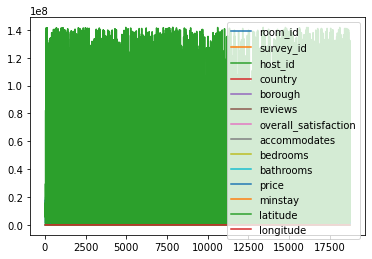

In [41]:
airbnb.plot()

<AxesSubplot:>

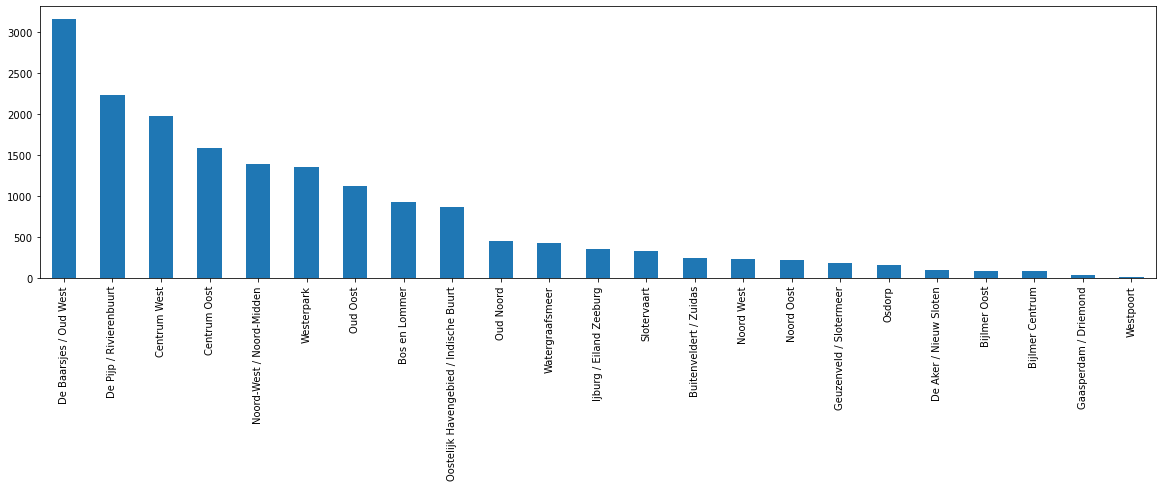

In [42]:
#Plotting neighborhood count
airbnb.neighborhood.value_counts().plot(kind='bar',figsize=(20,5))

<AxesSubplot:>

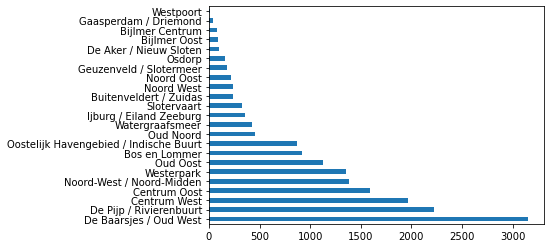

In [43]:
airbnb.neighborhood.value_counts().plot(kind='barh')

In [44]:
#Removing rows which are above Price range of 1500
airbnb[airbnb.price > 1500].count()
airbnb = airbnb[airbnb.price <1500]

In [45]:
airbnb.price.value_counts()

180.0    961
119.0    948
144.0    819
150.0    583
132.0    549
        ... 
369.0      1
371.0      1
451.0      1
449.0      1
41.0       1
Name: price, Length: 413, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


In [48]:
X = airbnb.iloc[:,[8,9,10,11,]]

In [49]:
Y = airbnb.price

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y.values,test_size = .3,random_state=1)

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred = lm.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
mean_absolute_error(y_test,y_pred)

49.76004810823678

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

77.03087690788918

In [58]:
lm.coef_

array([-0.15730951, 13.06118553, 26.17337276, 29.26738688])

In [59]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression()>


In [60]:
r2_score(y_test,y_pred)

0.3555865319381408

In [61]:
#Using one hot encoding to transform categorical values
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


### Because one hot encoding only takes numerical value, first need to convert the label into numeric and then use one hot encoding.

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
airbnb['room_type'] = le.fit_transform(airbnb['room_type'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\3782491319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['room_type'] = le.fit_transform(airbnb['room_type'])


In [65]:
airbnb['neighborhood'] = le.fit_transform(airbnb['neighborhood'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\2474955006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['neighborhood'] = le.fit_transform(airbnb['neighborhood'])


In [66]:
airbnb.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,0,NaN,Amsterdam,NaN,11,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,0,NaN,Amsterdam,NaN,21,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...


### Above we have converted the lables, now we'll use one hot encoding to create new variables

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [75]:
# Assuming you have a dataset 'X' with multiple columns
# and you want to one-hot encode the first two columns
ohc = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'  # Keep the remaining columns as they are
)


X_encoded = column_transformer.fit_transform(X)

In [76]:
X1 = airbnb.iloc[:,[3,7,8,9,10,11]]

In [77]:
X1.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,19,5.0,8,4.0
34,0,21,1,4.0,8,3.0


In [78]:
X1 = ohc.fit_transform(X1).toarray()

In [79]:
X1

array([[1. , 0. , 0. , ..., 5. , 8. , 4. ],
       [1. , 0. , 0. , ..., 4. , 8. , 3. ],
       [1. , 0. , 0. , ..., 5. , 4. , 3. ],
       ...,
       [0. , 1. , 0. , ..., 4. , 1. , 1. ],
       [0. , 1. , 0. , ..., 4.5, 2. , 1. ],
       [0. , 1. , 0. , ..., 4.5, 2. , 1. ]])

In [80]:
Y1 = airbnb.price

In [81]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1.values,test_size=.3,random_state=3)

In [82]:
lm1 = LinearRegression()

In [83]:
lm1.fit(X1_train, y1_train)

LinearRegression()

In [84]:
y1_pred = lm1.predict(X1_test)

In [85]:
r2_score(y1_test,y1_pred)

0.4501437823865341

In [86]:
mean_absolute_error(y1_test,y1_pred)

45.06464151273022

In [87]:
np.sqrt(mean_squared_error(y1_test,y1_pred))

71.54915621231251

### Creating log linear regression

In [88]:
X_log = airbnb.iloc[:,[3,7,8,9,10,11]]

In [89]:
X_log.head(2)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,19,5.0,8,4.0
34,0,21,1,4.0,8,3.0


In [91]:
X_log['reviews'] = np.log10(X_log['reviews']+1)
X_log['accommodates'] = np.log10(X_log['accommodates'])
X_log['bedrooms'] = np.log10(X_log['bedrooms'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\2535082129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_log['reviews'] = np.log10(X_log['reviews']+1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\2535082129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_log['accommodates'] = np.log10(X_log['accommodates'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\2535082129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [92]:
X_log.head(10)

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms
33,0,11,1.301030,5.0,0.903090,0.602060
34,0,21,0.301030,4.0,0.903090,0.477121
35,0,5,1.041393,5.0,0.602060,0.477121
36,0,20,0.301030,4.0,0.903090,0.477121
37,0,5,0.000000,4.0,0.602060,0.602060
38,0,14,0.477121,4.0,0.602060,0.301030
39,0,8,1.380211,4.5,0.602060,0.602060
40,0,6,0.000000,4.0,0.602060,0.301030
41,0,8,1.255273,4.5,0.602060,0.301030
42,0,4,1.204120,5.0,0.778151,0.602060


In [93]:
X_log = ohc.fit_transform(X_log).toarray()

In [94]:
xlog_train,xlog_test,ylog_train,ylog_test = train_test_split(X_log,Y.values,test_size=.3,random_state=5)


In [95]:
lm_log = LinearRegression()

In [96]:
lm_log.fit(xlog_train,ylog_train)

LinearRegression()

In [97]:
ylog_pred = lm_log.predict(xlog_test)

In [98]:
r2_score(ylog_test,ylog_pred)

0.3734175932010272

In [99]:
mean_absolute_error(ylog_test,ylog_pred)

47.053942106265474

In [100]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

79.67491904544138

In [101]:
xlog_df = pd.DataFrame(X_log)

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dt = DecisionTreeRegressor()

In [104]:
dt.fit(xlog_train,ylog_train)

DecisionTreeRegressor()

In [105]:
ylog_pred = dt.predict(xlog_test)

In [106]:
mean_absolute_error(ylog_test,ylog_pred)

52.6291005834834

In [107]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

90.91990383304517

In [109]:
#Decision tree regression using cirterin as friedman_mse
dt = DecisionTreeRegressor(criterion="friedman_mse")
dt.fit(xlog_train,ylog_train)
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

52.91362042260238
91.39028555339598


In [122]:
#Decision tree regression using criterion as mae
dt = DecisionTreeRegressor(criterion='squared_error')
dt.fit(xlog_train,ylog_train)
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

52.58897020771221
90.94587549636343


In [123]:
#Decision tree regression using criterion as mae using max_depth=3 and min_sample_leaf=5     
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=10,min_samples_leaf=20)     
dt.fit(xlog_train,ylog_train)     
ylog_pred = dt.predict(xlog_test)
print(mean_absolute_error(ylog_test,ylog_pred))     
print(np.sqrt(mean_squared_error(ylog_test,ylog_pred)))

46.07728287955428
79.5399402662885


## Cross Validation to better understand the accuracy on decision tree

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [125]:
lm= LinearRegression()
print(lm)

LinearRegression()


In [126]:
scores = cross_val_score(lm, X,Y,cv=10,scoring='neg_mean_absolute_error')

In [127]:
print(-scores)

[162.75865697  61.10659055  46.93939108  37.75342272  37.9775013
  32.13648873  35.29429125  56.83694596  33.75246922  60.76165455]


In [128]:
print(-scores.mean())

56.53174123372374


## Cross Validation to better understand the accuracy on decision tree

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=10,min_samples_leaf=20)
scores = cross_val_score(dt, X,Y,cv=10,scoring='neg_mean_absolute_error')

In [131]:
print(-scores)

[170.14037065  66.68860438  49.05669588  38.49104843  38.14847968
  30.75277267  36.08505621  56.67461089  35.42712184  64.88133649]


In [132]:
-scores.mean()

58.63460971298699

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
max_depth_range = list(range(1,5))

In [135]:
param_grid = dict(max_depth = max_depth_range)

In [136]:
grid = GridSearchCV(dt, param_grid, cv=10,scoring='neg_mean_absolute_error',return_train_score=False)

In [137]:
grid.fit(X,Y)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=20),
             param_grid={'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_absolute_error')

In [139]:
print(grid.best_score_)     
print(grid.best_params_)     
print(grid.best_estimator_)

-58.885712524902814
{'max_depth': 4}
DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)


### Trying with Random Forest Regressor 

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rf = RandomForestRegressor()

In [142]:
rf.fit(xlog_train,ylog_train)

RandomForestRegressor()

In [143]:
ylog_pred = rf.predict(xlog_test)

In [144]:
mean_absolute_error(ylog_test,ylog_pred)

48.20756757526306

In [140]:
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

In [146]:
rf = RandomForestRegressor(criterion='squared_error')
rf.fit(xlog_train,ylog_train)
ylog_pred = rf.predict(xlog_test)
mean_absolute_error(ylog_test,ylog_pred)
np.sqrt(mean_squared_error(ylog_test,ylog_pred))

81.76040555671663